# Índice del Estudio

1. [Introducción](#1-introduccion)
    - [Objetivo principal](#objetivo-principal)
    - [Metodología y estructura](#metodologia-y-estructura)
2. [Recopilación de Datos](#2-recopilacion-de-datos)
    - [Fuentes de datos](#fuentes-de-datos)
    - [Descripción de los datos](#descripción-de-los-datos)
    - [Análisis exploratorio inicial](#análisis-exploratorio-inicial)
3. [Preprocesamiento de los Datos](#3-preprocesamiento-de-los-datos)
    - [Limpieza de datos](#limpieza-de-datos)
    - [Separar características](#separar-características)
    - [Correlación entre características](#correlación-entre-características)
    - [Estandarización de los datos](#estandarizacion-de-los-datos)
    - [Redimensión de los datos](#redimension-de-los-datos)
4. [Entrenamiento de Modelos](#4-entrenamiento-de-modelos)
    - [Lineales](#lineales)
        - [Perceptrón](#perceptrón)
        - [Regresión Logística](#regresión-logística)
     - [No Lineales](#no-lineales)
         - [Árboles de decisión](#árboles-de-decisión)
         - [Bosques Aleatorios](#random-forest)
         - [SVM](#svm)
5. [Evaluación de Resultados](#5-evaluación-de-resultados)
   - [Métricas utilizadas](#métricas-utilizadas)
   - [Accuracy](#accuracy)
   - [Precision](#precision)
    - [Recall](#recall)
    - [F1-Score](#f1-score)
    - [Comparativa entre modelos](#comparativa-entre-modelos)
6. [Conclusiones](#conclusiones)
7. [Créditos](#creditos)

## 1- Introducción

El aprendizaje automático se ha convertido en una herramienta fundamental para abordar problemas complejos en diversas áreas. Este estudio tiene como objetivo principal poner en práctica los conceptos y técnicas aprendidas sobre modelos de aprendizaje automático mediante la implementación, ajuste y evaluación de modelos para resolver un problema específico: la clasificación del tipo de cobertura forestal. Además, este estudio no solo pretende ser una comparación del rendimiento técnico de los modelos, sino también fomentar nuestro análisis reflexivo y crítico que permita entender mejor cómo y por qué estos modelos funcionan en el contexto del conjunto de datos proporcionado.


### Objetivo principal

El propósito es aplicar metodologías de aprendizaje supervisado para desarrollar un modelo capaz de clasificar tipos de cobertura forestal con alta precisión. Este proceso incluirá desde la exploración inicial de datos hasta la evaluación comparativa de modelos. Se trata de un problema de clasificación multi-clase con 7 categorías diferentes.

### Metodología y estructura

Para arrollar nuestro objetivo en su totalidad, hemos seguido un enfoque estructurado en varias fases clave.

* Recopilación de datos: Inicialmente, se recopilarán los datos que contienen características relevantes sobre la cobertura forestal, lo cual es esencial para entrenar los modelos de forma efectiva. Estos datos incluyen tanto características numéricas como binarias que describen diferentes aspectos del terreno.

* Preprocesamiento de los datos: En esta etapa, se estandarizarán las características numéricas y se transformaron las variables a un formato adecuado para su procesamiento. Además, se llevarán a cabo pasos adicionales de limpieza y validación de los datos para asegurarse de que el conjunto esté listo para el entrenamiento del modelo.

* Entrenamiento de los modelos: Se entrenarán varios modelos de aprendizaje automático por separado, modelos lineales como no lineales. Cada modelo fue ajustado a los datos preprocesados, con el fin de obtener los mejores resultados posibles. Además, se aplicará una técnica de validación cruzada con el fin de obtener la mejor combinación de hiperparámetros posible, buscando optimizar el rendimiento de los modelos.

* Evaluación del rendimiento: Una vez entrenados los modelos, se evaluará su desempeño utilizando métricas estándar como la precisión, la recall, la F1-score y la matriz de confusión. Esto permitirá identificar la efectividad de cada modelo para posteriormente compararlos.

* Análisis crítico: Finalmente, se realizará un análisis reflexivo y crítico sobre los resultados obtenidos, comparando el rendimiento de los modelos y evaluando sus fortalezas y limitaciones en el contexto de los datos. Este análisis permitirá identificar qué modelos funcionan mejor, entender los motivos detrás de sus resultados y cómo pueden mejorarse en futuras iteraciones.


## 2 - Recopilación de Datos

### Fuentes de datos

Utilizaremos el al conjunto de datos *Forest Cover Type Dataset*, que recoge información detallada sobre las características del suelo y la vegetación del Bosque Nacional de Roosevelt, situado en los Estados Unidos . Consta de 581,013 muestras, cada una descrita por 54 atributos que incluyen características como la altitud, la inclinación del terreno, el tipo de suelo y el tipo de sombra, entre otros. 

Usaremos la librería de pandas para manipular el DataFrame y aprovecharemos e importaremos librerías gráficas para la representación de datos.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Una vez hechos los *imports*,  se pueden cargar los datos.

In [2]:
df = pd.read_csv("covtype.csv")
pd.set_option('display.max_columns', None)

### Descripción de los datos

### Análisis exploratorio inicial

De primera mano, vamos a examinar los datos para comprender su naturaleza y estructura. Esto incluye una inspección inicial de las características, tipos de datos, y una visualización básica de las distribuciones.


In [3]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


Esta primera visualización proporciona una visión general del tipo de datos que contiene cada característica, permitiéndonos identificar si son numéricas, categóricas o binarias. Dado que nuestro conjunto de datos combina estos tres tipos de características, será fundamental implementar estrategias adecuadas para preservar el significado propio de cada característica y evitar la introducción de sesgos durante el preprocesamiento y el entrenamiento del modelo.

Para visualizar las diferencias entre las escalas y distribuciones de las características no binarias de nuestro conjunto de datos, generaremos una serie de gráficos de distribución. Estos gráficos permiten observar la naturaleza de cada característica, identificando patrones, valores atípicos y diferencias en magnitud. A continuación, se presentan los histogramas generados para aquellas características con tres o más valores únicos, donde cada gráfico incluye una línea de densidad para facilitar el análisis de la forma de las distribuciones.

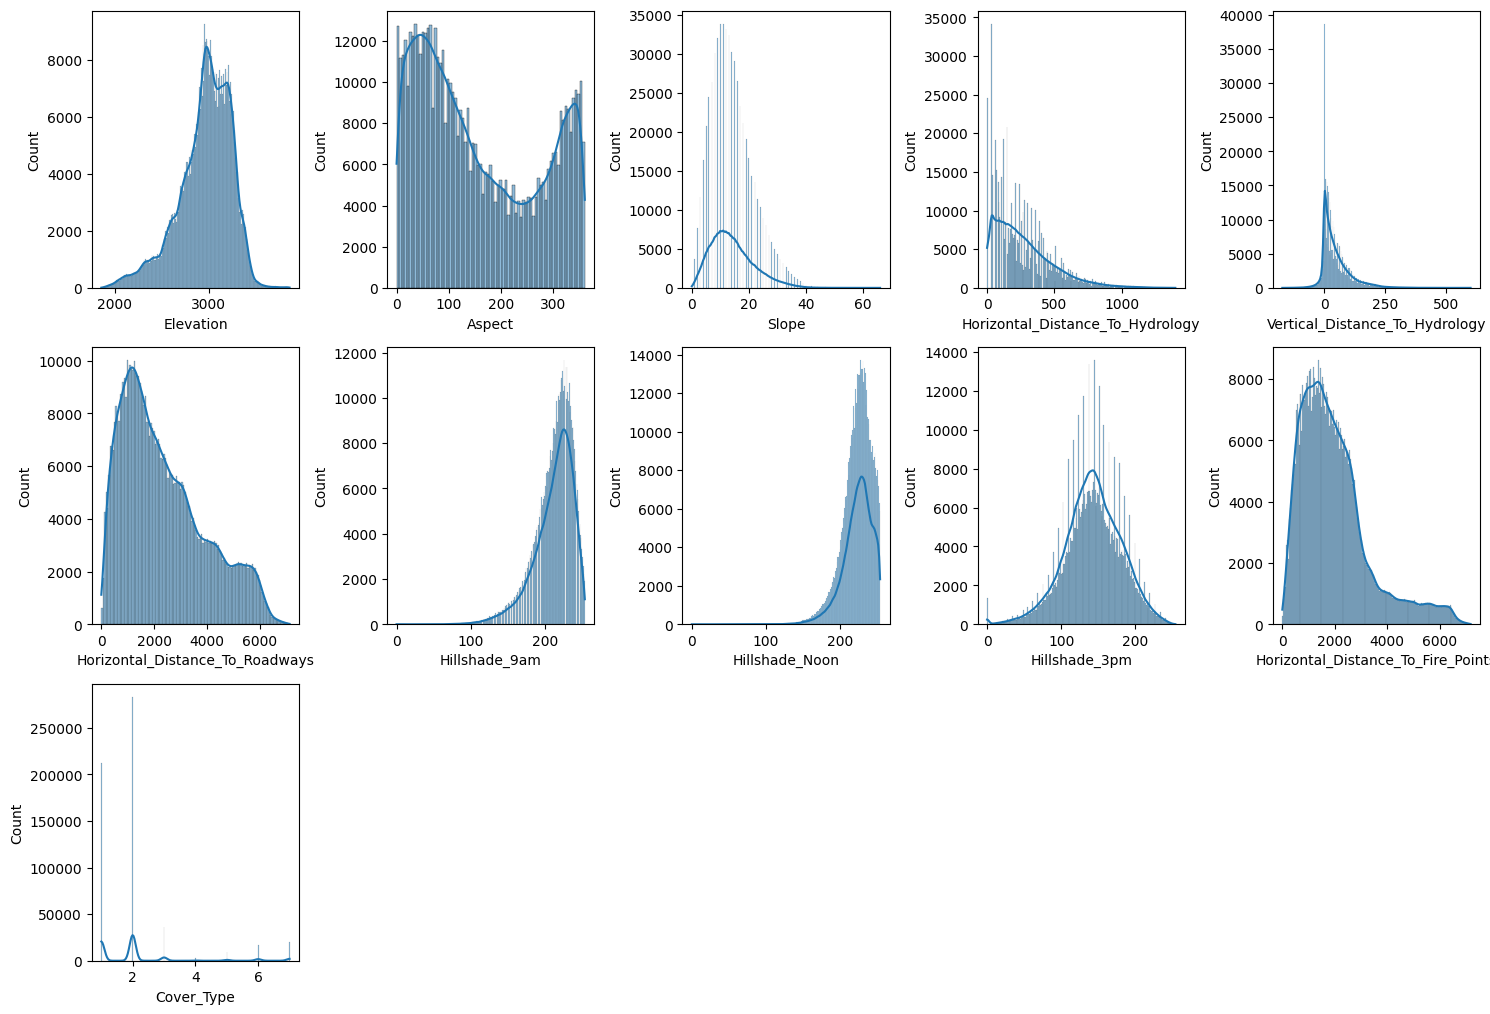

In [4]:
plt.figure(figsize=(15,30))
plot_num = 1

for col in df.columns:
    if df[col].nunique() >= 3:
        plt.subplot(9,5,plot_num)
        sns.histplot(x=df[col],kde=True)
        plot_num +=1
        plt.tight_layout()
        

Como podemos ver, la diferencia de escalas es muy diferente entre características numéricas lo que influirá a la hora de asignarles pesos dando más relevancia a aquellas características con mayor magnitud. Esto introduciría sesgos a la hora de entrenar el modelo pero lo resolveremos en el proceso de estandarización.

In [5]:
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import linear_model # Modelos lineales(Perceptron y Regresion Logística)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Métricas de rendimiento
from sklearn.model_selection import train_test_split, GridSearchCV #Division entre train y test + GridSearchCV
from sklearn.preprocessing import StandardScaler #Estandarización normal

## 3 - Preprocesamiento de los datos

#### Limpieza de datos

El primer paso será limpiar los datos. Esto es crucial para asegurarnos de que el conjunto de datos esté en un estado adecuado para el análisis. Para ello, realizaremos lo siguiente:

* Identificar valores faltantes: Revisar si alguna de las columnas tiene valores faltantes (NaN o valores nulos). Esta acción es importante pues los  modelos no pueden manejar valores faltantes. En caso de encontrar celdas no válidas, se pueden tomar diferentes decisiones según sea necesario.
* Detectar valores atípicos:  Verificar si existen valores no permitidos. Si se detectan valores atípicos (por ejemplo, datos categoricos o ruido), se procederá a ajustarlos según convenga para el modelo.

Como se puede apreciar, nuestro DataFrame tiene un total de 55 características de las cuales concluimos que 10 características son  enteras (números), 44 son binarias y 1 variable categorica numérica, categoría que tiene que poder ser capaz de predecir nuestro modelo.  Verificaremos que todas las columnas tengan valores que sean válidos para el interés de nuestro estudio.

In [6]:

# Verificar si value es numérico
def is_numeric(value):
    try:
        float(value)  # Intentamos convertir el valor a flotante
        return True
    except ValueError:
        return False

# Iterar sobre las primeras 10 columnas  y verificar que no haya valores no numéricos
for column in df.columns[:10]: 
    # Convertir la columna a tipo string
    df[column] = df[column].astype(str)
    
    # Verificar las celdas que contienen valores no numéricos
    invalid_values = df[~df[column].apply(is_numeric)]
    
    if not invalid_values.empty:
        print(f"Valores no numéricos encontrados en la columna '{column}':")
        print(invalid_values)


# Iterar sobre las 44 columnas binarias
for column in df.columns[10:54]:
    #Verificar que la columna solo tenga valores 0 o 1
    if not df[column].isin([0, 1]).all():
        print(f"La columna {column} NO contiene valores binarios")

#Comprobar que la columna de la categoria tenga valores categoricos válidso (1 al 7)
if not df["Cover_Type"].isin(range(1, 8)).all():
    print(f"La columna {column} NO contiene valores categóricos validos")

#### Separar características

 A partir de ahora, es interesante dividir nuestros datos en dos conjuntos bien diferenciados:
 * labels: representa las categorías de las muestras en nuestro conjunto de datos.
 * data: contiene el resto de las columnas del conjunto de datos, que incluyen las variables que describen cada muestra.

In [7]:
#Separar etiquetas de muestra y características descriptivas
# Extraer la columna 'Cover_type' y guardarla por separado
labels = df['Cover_Type']

# Eliminar la columna 'Cover_type' del dataframe original
data = df.drop(columns=['Cover_Type'])

#### Correlación entre características

La correlación es un concepto estadístico que mide la fuerza y la dirección de la relación entre dos o más variables. Es una herramienta clave en el análisis de datos, ya que nos permite entender cómo interactúan las variables dentro de un conjunto de datos y si existe una relación significativa entre ellas.

En términos simples, la correlación nos dice si dos variables están relacionadas, y si lo están, en qué medida una variable cambia cuando la otra lo hace. En concreto, usaremos la correlación de Peterson integrada en *pandas*, donde los valores del coeficiente de correlación pueden variar entre -1 y 1:

* Un valor de 1 indica una correlación positiva perfecta, es decir, que a medida que una variable aumenta, la otra también aumenta de manera proporcional.
* Un valor de -1 indica una correlación negativa perfecta, donde una variable aumenta mientras la otra disminuye.
* Un valor cercano a 0 indica poca o ninguna correlación, lo que significa que los cambios en una variable no están relacionados con los cambios en la otra.

En general, estudiar dicha medida ofrece varias ventajas clave:
* Selección de características: Permite reducir la dimensionalidad eliminando variables irrelevantes o redundantes.
* Priorización del análisis: Permite focalizarse en las variables con mayor impacto, optimizando tiempo y recursos.
* Preprocesamiento eficiente: Facilita decisiones sobre escalado, transformación o simplificación de datos.

Dado que nuestro conjunto de datos *data* contiene características significativamente diferentes (numéricas y binarias), procederemos a separarlas para calcular la correlación de manera más adecuada. Además, aprovecharemos esta separación para distinguir entre los distintos tipos de características binarias (wilderness_area y soil_type), con el objetivo de redimensionarlas en el futuro sin perder su esencia representativa.

In [8]:
# Separar características no binarias y binarias
binary_features = data.iloc[:, -44:]     # Las últimas 44 columnas son binarias

# Las primeras 4 columnas corresponden a las características de Wildernes_Area
wilderness_features = binary_features.iloc[:, :4]
# Las últimas 40 columnas corresponden a las características de Soil-Type
soil_features = binary_features.iloc[:, 4:]

not_binary_features = data.iloc[:, :-44]  # El resto son NO binarias

Para simplificar este análisis, nos enfocaremos en calcular la matriz de correlación exclusivamente entre las variables numéricas.

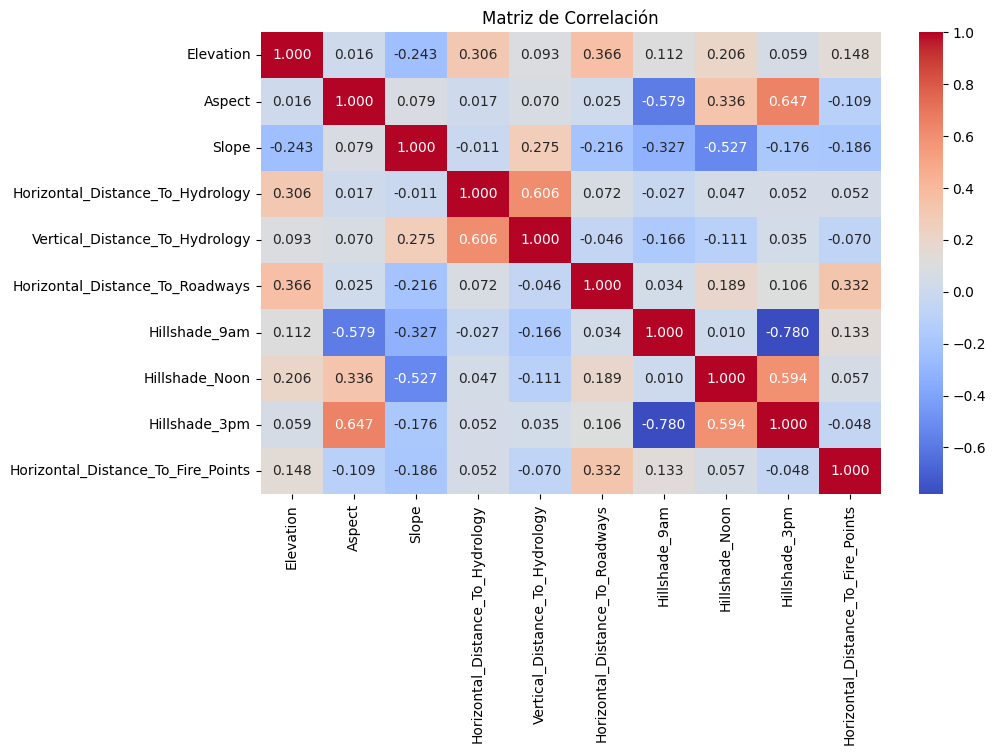

In [9]:
# Calcular correlación numérica entre variables numéricas (Pearson por defecto)
correlation_num = not_binary_features.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_num, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Matriz de Correlación")
plt.show()

Definiremos un umbral arbitrario |0.9| para identificar relaciones significativamente fuertes. En caso de encontrar dichas relaciones, evaluaremos cómo procesar estas características, diferenciando entre correlaciones positivas y negativas según su impacto y relevancia en el contexto del análisis.

In [10]:
#Umbral arbirtrario
umbral = 0.9

# Filtrar las correlaciones con valor absoluto mayor a 0.9
high_correlation = correlation_num.stack().reset_index()
high_correlation.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Filtrar correlaciones fuertes, excluyendo las de una variable consigo misma
high_correlation_filtered = high_correlation[
    (high_correlation['Correlation'].abs() > umbral) & 
    (high_correlation['Variable 1'] != high_correlation['Variable 2'])
]

# Mostrar las relaciones filtradas
high_correlation_filtered

,Variable 1,Variable 2,Correlation


Dado que no se han identificado variables con correlaciones significativamente altas, optamos por conservarlas en su forma original. Esta decisión se toma para evitar realizar modificaciones que podrían introducir sesgos innecesarios en el modelo sin un respaldo analítico sólido.

#### Estandarización de los datos

Tras completar los pasos anteriores, el siguiente objetivo es estandarizar los datos. Este proceso garantiza que todas las características contribuyan de manera equitativa al modelo, independientemente de su escala original. La estandarización es esencial para evitar que el modelo otorgue un peso desproporcionado a las características con rangos más amplios.

En nuestro conjunto de datos identificamos características binarias, como la presencia de un tipo de suelo concreto o no, y otras decimales, como la elevación del terreno, lo que condiciona el proceso de estandarización. Para preservar la naturaleza discreta de las características binarias:

* Se aplicará una estandarización normal de las características NO binarias.
* Se conservará el significado absoluto de las características binarias.

In [11]:
# Aplicamos la estadarización normal
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(not_binary_features)

#Mostrar datos en formato DataFrame
scaled_numerical_df = pd.DataFrame(
    scaled_numerical, 
    columns=not_binary_features.columns
)

# Concatenar las características numéricas escaladas y las binarias
scaled_data = pd.concat([scaled_numerical_df, binary_features.reset_index(drop=True)], axis=1)

scaled_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


--------------------------------------
#### Redimensión de los datos

Una vez que los datos han sido estandarizados, procederemos con un proceso de reducción de dimensionalidad. Este proceso permite transformar un conjunto de datos con muchas características en uno con un número reducido de variables significativas. En términos generales, la reducción de dimensionalidad nos ofrece:

* Simplificar del modelo: Reducir la cantidad de variables disminuye la complejidad del modelo, facilitando su interpretación y análisis.

* Aumentar la eficiencia computacional: Menos características reducen los tiempos de entrenamiento y predicción.

Para llevar a cabo esta tarea, utilizaremos la indexación de características binarias, que consiste en representar las características binarias excluyentes mediante índices únicos en lugar de codificaciones one-hot (tal como está actualmente). Este enfoque reduce la dimensionalidad del conjunto de datos, ya que sustituye múltiples columnas binarias por una sola columna que contiene índices que representan las categorías originales. 

Dicha técnica es útil en modelos como *Random Forest* y *Decision Trees*, ya que permite reducir el tiempo de entrenamiento al disminuir la dimensionalidad del conjunto de datos. Al consolidar múltiples columnas binarias en una sola columna con índices, se reduce el número de divisiones posibles que los árboles deben evaluar en cada nodo, acelerando el proceso de construcción del modelo.

Además, dado que estos modelos no dependen de la escala de las características ni asumen relaciones lineales entre ellas, pueden manejar de manera eficiente las características representadas mediante índices sin necesidad de normalizarlas o estandarizarlas previamente.

In [12]:

# Aplicamos la función para obtener el índice de la columna con el valor máximo (1)
wilderness_features_indexed = wilderness_features.apply(lambda row: row.argmax()+1, axis=1)
soil_features_indexed = soil_features.apply(lambda row: row.argmax()+1, axis=1)

new_df = pd.DataFrame({
    'Wilderness_Area': wilderness_features_indexed,
    'Soil_Type': soil_features_indexed
})

scaled_data_reformed = pd.concat([scaled_numerical_df, new_df], axis=1)
scaled_data_reformed.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type
0,-1.297805,-0.935157,-1.482820,-0.053767,-0.796273,-1.180146,0.330743,0.439143,0.142960,3.246283,1,29
1,-1.319235,-0.890480,-1.616363,-0.270188,-0.899197,-1.257106,0.293388,0.590899,0.221342,3.205504,1,29
2,-0.554907,-0.148836,-0.681563,-0.006719,0.318742,0.532212,0.816364,0.742654,-0.196691,3.126965,1,12
3,-0.622768,-0.005869,0.520322,-0.129044,1.227908,0.474492,0.965786,0.742654,-0.536343,3.194931,1,30
4,-1.301377,-0.988770,-1.616363,-0.547771,-0.813427,-1.256464,0.293388,0.540313,0.195215,3.165479,1,29


## 4 - Entrenamiento de Modelos

Después del preprocesado los datos, el siguiente paso es crear los conjuntos de entrenamiento (train) y prueba (test) para poder entrenar y evaluar nuestro modelo de manera adecuada. En este proceso, es importante definir:

* Tamaño del conjunto de prueba: Esto indica qué proporción de los datos totales se reservará para evaluar el modelo. Comúnmente, se utiliza un valor del 20%-30%.

* Semilla aleatoria (random state): Este valor garantiza que el proceso de división de los datos sea reproducible, permitiendo obtener los mismos conjuntos en ejecuciones posteriores.

Además, estableceremos dos arrays para registrar:

* El modelo entrenado.
* Su precisión obtenida al evaluarlo sobre el conjunto de prueba.

Estos pasos garantizan una organización estructurada de los resultados, facilitando el análisis posterior del rendimiento de los distintos modelos probados.

In [13]:
#Obtención de conjuntos (70% train - 30% test) - binarios juntos
x_train,x_test,y_train,y_test = train_test_split(scaled_data_reformed,labels,test_size=0.30,random_state=42)


#Obtención de conjuntos (70% train - 30% test) - binarios separados
x_train_separed,x_test_separed,y_train,y_test = train_test_split(scaled_data,labels,test_size=0.30,random_state=42)

#Arrays auxiliares
model_name = []
score = []

Para optimizar la búsqueda de la mejor combinación de hiperparámetros, emplearemos GridSearchCV, una herramienta que realiza una búsqueda exhaustiva probando todas las combinaciones posibles de valores para los hiperparámetros de un modelo. Esto la convierte en una técnica ideal cuando no se tienen certezas sobre cuáles son los valores más adecuados para cada hiperparámetro.

GridSearchCV evalúa cada combinación de valores utilizando validación cruzada para medir el rendimiento del modelo en cada caso. Finalmente, selecciona la configuración que ofrece el mejor desempeño basado en la métrica de evaluación definida.

El coste computacional de GridSearchCV puede ser costoso si el espacio de búsqueda es muy grande, por ello hemos de elegir bien cuales hiperparámetros variar.


### Lineales

#### Perceptrón

El Perceptrón es uno de los modelos más básicos de aprendizaje automático. Es un clasificador lineal que busca separar los datos mediante un hiperplano. Consiste en una capa de entrada, pesos asociados a las características, un sesgo (bias) y una función de activación . Se entrena ajustando los pesos iterativamente para minimizar los errores de clasificación en un conjunto de datos. Aunque es simple y eficiente, su principal limitación es que solo puede resolver problemas linealmente separables.

La fórmula básica del perceptrón es la siguiente:

$y = f\left(\sum_{i=1}^{n} w_i x_i + b\right)$

Donde:
- $y$ es la salida o predicción del modelo.
- $f$ es la función de activación (en un perceptrón tradicional, se utiliza una función escalón o signo: $f(z) = 1 si z \geq 0 y f(z) = 0 si z < 0)$
- $x_i$ son los valores de las características de entrada (es decir, las variables del conjunto de datos).
- $w_i$ son los pesos asociados a cada característica $x_i$
- $b$ es el sesgo o término de desplazamiento.
- $n$ es el número de características de entrada.

En el Perceptron, los hiperparámetros que variaremos serán:

* max_iter: Especifica el número máximo de iteraciones que el algoritmo realiza durante el entrenamiento.
    * Valores muy bajos pueden no contribuir a encontrar un ajuste óptimo para el modelo.
    * Valores demasiado altos permiten al modelo entrenarse durante más tiempo sacrificando rendimiento en costo computacional.
* tol: Define el umbral de tolerancia (bias) para el criterio de parada.
    * Valores pequeños: puede producir un modelo más ajustado pero también aumentar el tiempo de entrenamiento.
    * Valores grandes: reduce el tiempo de entrenamiento, pero podría detenerse antes de alcanzar una solución óptima. 
* eta0: Controla qué tan grande es el ajuste de los pesos en cada iteración. 
    * Valores pequeños: Cambios pequeños en los pesos, lo que puede ralentizar encontrar la solución óptima, pero asegura estabilidad.
    * Valores grandes: Cambios grandes en los pesos, que pueden llevar a solución rapidamente, pero aumentando el riesgo que sea la más óptima.

In [14]:
perceptron = linear_model.Perceptron(random_state=42)

param_grid = {
    'max_iter': [300, 500],       # Número de iteraciones
    'tol': [1e-3, 1e-6, 1e-9],    # Tolerancia moderada para detener el entrenamiento
    'eta0': [0.1, 0.5, 1.0]       # Tasa de aprendizaje inicial
}

# Realizar Grid Search para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(perceptron, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=0)
grid_search.fit(x_train_separed, y_train)
y_pred = grid_search.predict(x_test_separed)

# Resultados
print("Mejores hiperparametros:", grid_search.best_params_)
print("Accuracy con el mejor modelo: " , grid_search.best_score_)
print(classification_report(y_test, y_pred))

model_name.append("Perceptrón")
score.append(grid_search.best_score_)

Mejores hiperparametros: {'eta0': 0.1, 'max_iter': 300, 'tol': 0.001}
Accuracy con el mejor modelo:  0.6378360082399869
              precision    recall  f1-score   support

           1       0.73      0.35      0.47     63556
           2       0.64      0.86      0.73     85078
           3       0.56      0.87      0.68     10638
           4       0.54      0.34      0.42       795
           5       0.03      0.05      0.04      2941
           6       0.34      0.05      0.09      5227
           7       0.52      0.67      0.59      6069

    accuracy                           0.63    174304
   macro avg       0.48      0.45      0.43    174304
weighted avg       0.64      0.63      0.60    174304



<Axes: >

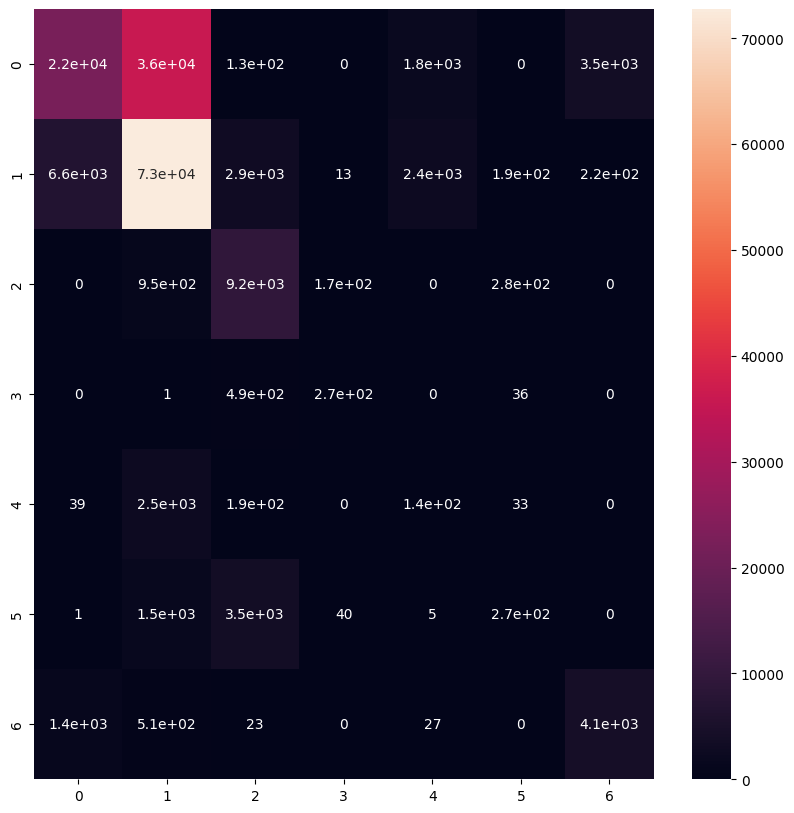

In [15]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))

sns.heatmap(cm, annot=True)

#### Regresión Logística

En estadística, la **regresión logística** es un tipo de análisis de clasificación utilizado para predecir el resultado de una variable categórica (una variable que puede adoptar un número limitado de categorías) en función de las variables independientes o predictoras. Es útil para modelar la probabilidad de un evento ocurriendo en función de otros factores. El análisis de regresión logística se enmarca en el conjunto de Modelos Lineales Generalizados (GLM por sus siglas en inglés) que usa como función de enlace la función logit. Las probabilidades que describen el posible resultado de un único ensayo se modelan como una función de variables explicativas, utilizando una función logística.

La idea es que la **regresión logística** aproxime la probabilidad de obtener "0" (no ocurre cierto suceso) o "1" (ocurre el suceso) con el valor de la variable explicativa x. En esas condiciones, la probabilidad aproximada del suceso se aproximará mediante una función logística del tipo:

$h_{\theta}(x) = g(\theta^Tx) = \frac{1}{1 + e^-{\theta^Tx}}$

Graficamente se podria ver de la siguiente manera:

![proces](Logistic-curve.png)

En Regresión Logistica, los hiperparámetros que variaremos serán:

* penalty: donde usaremos 'l2' que es la regularización más comúnmente utilizada, que penaliza los coeficientes más grandes del modelo para evitar el sobreajuste. La regularización L2 es ideal para modelos lineales, ya que controla la magnitud de los coeficientes sin hacerlos cero, mejorando la generalización.
* C: El parámetro C controla la intensidad de la regularización.
    * Valores pequeños: mayor regularización, lo que hace que el modelo sea más simple, pero puede resultar en un ajuste deficiente.
    * Valores grandes: menos regularización, lo que permite al modelo ajustarse más a los datos, pero puede causar sobreajuste si es muy alto.
* solver: El solver es el algoritmo que se utiliza para optimizar la función de coste del modelo. Se selecciona 'liblinear' porque es eficiente para modelos de tamaño medio y se ajusta bien a la regularización L2.
* max_iter: Especifica el número máximo de iteraciones que el algoritmo realizará para optimizar el modelo.
    * Valores pequeños: el modelo podría no converger adecuadamente, especialmente si los datos son complejos o si el tamaño del conjunto de entrenamiento es grande.
    * Valores grandes: Permite más tiempo de entrenamiento y una mejor oportunidad de encontrar la solución óptima. Sin embargo, puede aumentar el costo computacional.

In [16]:
logistic_regression = LogisticRegression()

# Conjunto reducido de hiperparámetros
param_grid = {
    'penalty': ['l2'],             # Regularización L2 (la más común)
    'C': [100, 1000, 10000],       # Reducir el rango de valores de regularización
    'solver': ['liblinear'],       # Un solo solver compatible con L2
    'max_iter': [300, 500],        # Solo dos opciones de iteraciones
}

grid_search = GridSearchCV(logistic_regression, param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train_separed, y_train)
y_pred = grid_search.predict(x_test_separed)

print("Mejores hiperparametros: ", grid_search.best_params_)
print("Accuracy con el mejor modelo: " , grid_search.best_score_)
print(classification_report(y_test, y_pred))

model_name.append("Regresión Logística")
score.append(grid_search.best_score_)

Mejores hiperparametros:  {'C': 100, 'max_iter': 300, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy con el mejor modelo:  0.7158206901030751
              precision    recall  f1-score   support

           1       0.71      0.69      0.70     63556
           2       0.74      0.79      0.76     85078
           3       0.61      0.85      0.71     10638
           4       0.62      0.30      0.41       795
           5       0.25      0.01      0.03      2941
           6       0.43      0.09      0.15      5227
           7       0.71      0.53      0.61      6069

    accuracy                           0.71    174304
   macro avg       0.58      0.47      0.48    174304
weighted avg       0.70      0.71      0.70    174304



<Axes: >

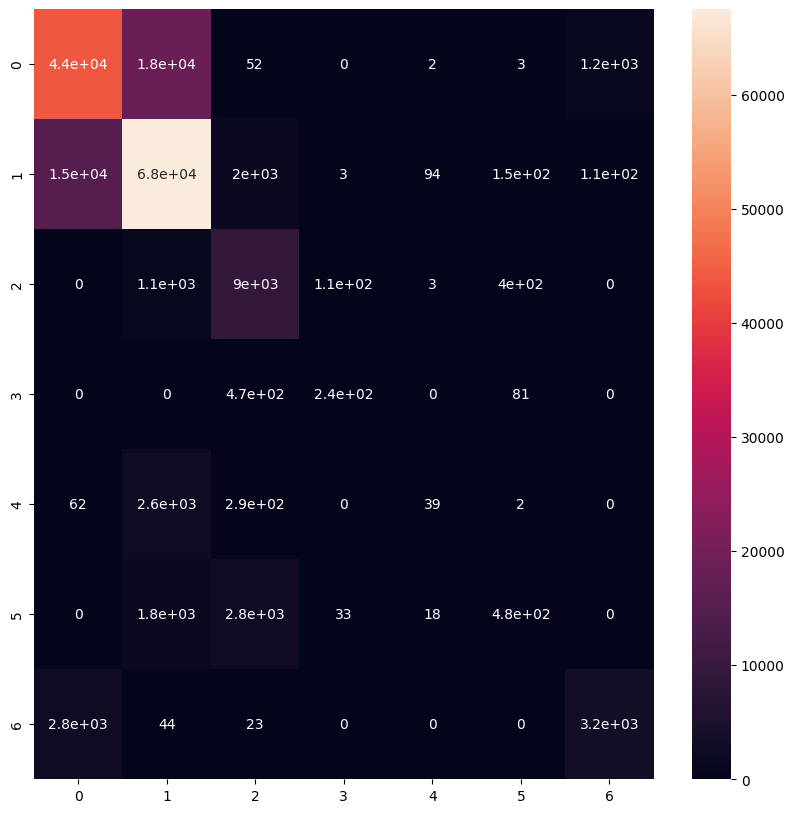

In [17]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))

sns.heatmap(cm, annot=True)

### No Lineales

#### Árboles de decisión

Los árboles de decisión (DT) son un método de aprendizaje supervisado no paramétrico que se utiliza para clasificación y regresión. El objetivo es crear un modelo que prediga el valor de una variable objetivo aprendiendo reglas de decisión simples inferidas de las características de los datos. Un árbol puede verse como una aproximación constante por partes.

Por ejemplo, en el siguiente ejemplo, los árboles de decisión aprenden de los datos a aproximarse a una curva sinusoidal con un conjunto de reglas de decisión si-entonces-si no. Cuanto más profundo sea el árbol, más complejas serán las reglas de decisión y más ajustado será el modelo.

![proces](Arbol.png)

En los Árboles de decisión, los hiperparámetros que variaremos serán:

* max_depth: Limita la profundidad máxima del árbol. Controla cuán profundo puede llegar el árbol antes de detenerse.
    * Valor None: sin restricción, lo que significa que el árbol puede crecer hasta que todas las hojas sean puras, lo que podría llevar a un sobreajuste si el árbol es demasiado profundo.
    * Otros valores: limitan el crecimiento del árbol, lo que puede ayudar a evitar el sobreajuste y hacer que el modelo sea más generalizable a nuevos datos.
* min_samples_split: Especifica el número mínimo de muestras que deben estar presentes en un nodo para que el algoritmo considere dividirlo.
    * Valores pequeños: el minimo es 2, el valor predeterminado, donde el árbol intentará dividir incluso con pocas muestras, lo que podría llevar a más sobreajuste si se tiene un árbol muy grande. 
    * Valores grandes: el árbol se vuelve más conservador en sus divisiones, lo que puede ayudar a evitar el sobreajuste al no hacer divisiones innecesarias en nodos con pocas muestras.
* min_samples_leaf: Especifica el número mínimo de muestras que debe contener una hoja (un nodo terminal) del árbol.
    * Valores pequeños: el árbol permitirá hojas con solo una muestra, lo que puede llevar a sobreajuste si el árbol tiene muchas hojas muy específicas.
    * Valores grandes: el árbol obliga a que las hojas tengan mas muestras, lo que puede hacer que el modelo sea más generalizable y menos propenso a sobreajustarse a ruido o pequeños detalles.
* crioterion: Define la función de costo que el árbol utiliza para realizar las divisiones de los nodos.
    * gini: el índice de Gini mide la impureza de un nodo, buscando el mejor punto de corte que maximice la pureza de las divisiones.
    * entropy: la entropía mide la impureza o incertidumbre de un nodo, buscando el corte que reduce la mayor cantidad de incertidumbre.

In [18]:
decision_tree = tree.DecisionTreeClassifier()

# Conjunto reducido de hiperparámetros
param_grid = {
    'max_depth': [None, 10, 20],        # Sin restricción, o profundidades de 10 y 20
    'min_samples_split': [2, 5, 10],    # Niveles bajos para divisiones mínimas
    'min_samples_leaf': [1, 2, 5],      # Número mínimo de muestras por hoja
    'criterion': ['gini', 'entropy'],   # Métricas de evaluación de nodos
}

grid_search = GridSearchCV(decision_tree, param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)
y_pred = grid_search.predict(x_test)

print("Mejores hiperparámetros:", grid_search.best_params_)
print("Accuracy con el mejor modelo:", grid_search.best_score_)
print(classification_report(y_test, y_pred))

model_name.append("Árboles de Decisión")
score.append(grid_search.best_score_)

Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy con el mejor modelo: 0.9247224069797442
              precision    recall  f1-score   support

           1       0.94      0.94      0.94     63556
           2       0.95      0.95      0.95     85078
           3       0.93      0.93      0.93     10638
           4       0.82      0.81      0.81       795
           5       0.85      0.83      0.84      2941
           6       0.88      0.88      0.88      5227
           7       0.95      0.95      0.95      6069

    accuracy                           0.94    174304
   macro avg       0.90      0.90      0.90    174304
weighted avg       0.94      0.94      0.94    174304



<Axes: >

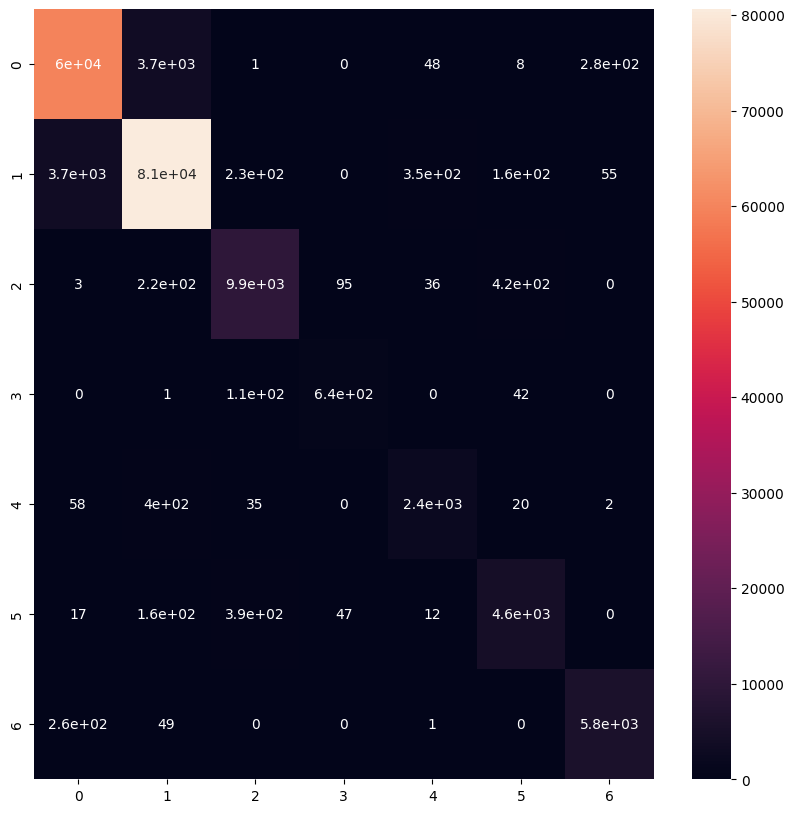

In [19]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))

sns.heatmap(cm, annot=True)

#### Bosques Aleatorios

El Random Forest es un modelo de aprendizaje conjunto basado en árboles de decisión. Construye múltiples árboles de decisión independientes entrenados sobre diferentes subconjuntos de datos y características, seleccionados aleatoriamente. Para clasificar o predecir, combina los resultados de todos los árboles mediante un voto mayoritario. Es robusto frente al sobreajuste, maneja bien datos con muchas características y proporciona estimaciones de importancia de características, aunque puede ser más lento en grandes conjuntos de datos.

En el RandomForest, los hiperparámetros que variaremos serán:

* n_estimators: Define el número de árboles en el bosque.
    * Valores pequeños: el rendimiento del disminuye al aumentar el error de generalización.
    * Valores grandes: mejoran el rendimiento al reducir el error de generalización, pero aumentan el costo computacional.
* max_depth: Limita la profundidad máxima del árbol. Controla cuán profundo puede llegar el árbol antes de detenerse.
    * Valor None: sin restricción, lo que significa que el árbol puede crecer hasta que todas las hojas sean puras, lo que podría llevar a un sobreajuste si el árbol es demasiado profundo.
    * Otros valores: limitan el crecimiento del árbol, lo que puede ayudar a evitar el sobreajuste y hacer que el modelo sea más generalizable a nuevos datos.
* max_features: Determina cuántas características considerar para dividir un nodo.
    * sqrt: recomendado para clasificación, mejora la diversidad entre árboles.
    * log2: reduce la cantidad de características consideradas, acelerando el entrenamiento.
* min_samples_split: Especifica el número mínimo de muestras que deben estar presentes en un nodo para que el algoritmo considere dividirlo.
    * Valores pequeños: el minimo es 2, el valor predeterminado, donde el árbol intentará dividir incluso con pocas muestras, lo que podría llevar a más sobreajuste si se tiene un árbol muy grande. 
    * Valores grandes: el árbol se vuelve más conservador en sus divisiones, lo que puede ayudar a evitar el sobreajuste al no hacer divisiones innecesarias en nodos con pocas muestras.
* bottstrap: Indica si las muestras se seleccionan con reemplazo para entrenar cada árbol.
    * True: El uso de bootstrap mejora la diversidad entre árboles, reduciendo la varianza del modelo.

In [20]:
random_forest = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],         # Número de árboles
    'max_depth': [None, 10, 20],        # Profundidad máxima
    'max_features': ['sqrt', 'log2'],   # Características consideradas
    'min_samples_split': [2, 5],        # Muestras mínimas para dividir
    'bootstrap': [True]                 # Uso de bootstrap
}

# Realizar Grid Search para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(random_forest, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=0)
grid_search.fit(x_train, y_train)
y_pred = grid_search.predict(x_test)

# Resultados
print("Mejores hiperparametros:", grid_search.best_params_)
print("Accuracy con el mejor modelo: " , grid_search.best_score_)
print(classification_report(y_test, y_pred))

model_name.append("Bosque Aleatorio")
score.append(grid_search.best_score_)

Mejores hiperparametros: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
Accuracy con el mejor modelo:  0.9520270065524513
              precision    recall  f1-score   support

           1       0.97      0.95      0.96     63556
           2       0.96      0.98      0.97     85078
           3       0.95      0.97      0.96     10638
           4       0.93      0.86      0.89       795
           5       0.94      0.80      0.87      2941
           6       0.94      0.91      0.93      5227
           7       0.98      0.96      0.97      6069

    accuracy                           0.96    174304
   macro avg       0.95      0.92      0.93    174304
weighted avg       0.96      0.96      0.96    174304



<Axes: >

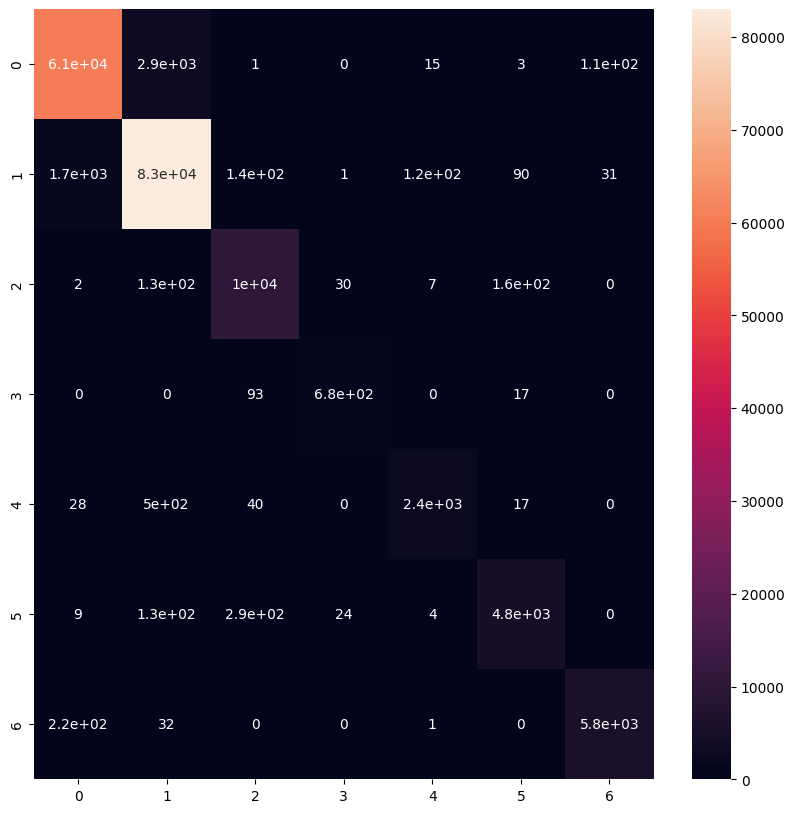

In [21]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))

sns.heatmap(cm, annot=True)

#### SVM

> Estos métodos están propiamente relacionados con problemas de clasificación y regresión. Dado un conjunto de ejemplos de formación (de muestras) podemos etiquetar las clases y formar una SVM para construir un modelo que prediga la clase de una nueva muestra. Intuitivamente, una SVM es un modelo que representa a los puntos de muestra en el espacio, separando las clases a 2 espacios lo más amplios posibles mediante un hiperplano de separación definido como el vector entre los 2 puntos, de las 2 clases, más cercanos al que se llama vector soporte. Cuando las nuevas muestras se ponen en correspondencia con dicho modelo, en función de los espacios a los que pertenezcan, pueden ser clasificadas a una o la otra clase.  [Link](https://es.wikipedia.org/wiki/M%C3%A1quina_de_vectores_de_soporte)

Más formalmente, una SVM construye un hiperplano o conjunto de hiperplanos en un espacio de dimensionalidad muy alta (o incluso infinita) que puede ser utilizado en problemas de clasificación o regresión. Una buena separación entre las clases permitirá una clasificación correcta.

En el SVM, los hiperparámetros que variaremos serán:

* C: El parámetro C controla la intensidad de la regularización.
    * Valores pequeños: mayor regularización, lo que hace que el modelo sea más simple, pero puede resultar en un ajuste deficiente.
    * Valores grandes: menos regularización, lo que permite al modelo ajustarse más a los datos, pero puede causar sobreajuste si es muy alto.
* kernel: Especifica el tipo de función de kernel que se utiliza para transformar los datos en un espacio de mayor dimensión donde sea posible encontrar un hiperplano separador.
    * linear: utiliza un kernel lineal, adecuado para datos que son linealmente separables.
    * rbf: utiliza el kernel radial (Radial Basis Function), que es más adecuado para datos no lineales y puede transformar los datos en un espacio de alta dimensión para encontrar un hiperplano separador no lineal.
* gamma: Especifica el número mínimo de muestras que debe contener una hoja (un nodo terminal) del árbol.
    * scale: la opción predeterminada, donde gamma es inversamente proporcional al número de características. Esto ajusta automáticamente gamma en función de los datos.
    * auto: el valor de gamma se ajusta automáticamente como 1 / número de características. Generalmente es menos efectivo que 'scale'.
    * Valor: valor específico de gamma que controla la forma de la función RBF, ajustando cuán fuerte es la influencia de los puntos de entrenamiento cercanos.

Debido a la complejidad temporal asociada con las pruebas de diferentes hiperparámetros en SVM, hemos optado por entrenar el modelo utilizando un conjunto de hiperparámetros arbitrarios, aunque esto pueda implicar un rendimiento subóptimo. Sin embargo, seguimos considerando como hiperparámetros más relevantes a probar los previamente explicados.

In [22]:
#Conjunto de hiperparámetros de ejemplo
param_grid = {
    'C': [0.1, 1, 10],                  # Regularización (baja, media, alta)
    'kernel': ['linear', 'rbf'],        # Tipos de kernel más comunes
    'gamma': ['scale', 'auto', 0.01],   # Coeficiente para el kernel RBF
}

model = SVC(kernel='rbf', C=1.0, gamma='scale',max_iter= 10**6)
model.fit(x_train_separed, y_train)
y_pred = model.predict(x_test_separed)
accuracy = accuracy_score(y_test, y_pred)


print(f"Clasificación: SVM No Lineal\n")
print(f"Precisión: {accuracy}")
print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

model_name.append("SVM")
score.append(accuracy)

Clasificación: SVM No Lineal

Precisión: 0.8294129796218102
Informe de clasificación:
              precision    recall  f1-score   support

           1       0.84      0.79      0.81     63556
           2       0.83      0.89      0.86     85078
           3       0.80      0.87      0.84     10638
           4       0.85      0.71      0.78       795
           5       0.88      0.29      0.44      2941
           6       0.73      0.56      0.63      5227
           7       0.89      0.82      0.86      6069

    accuracy                           0.83    174304
   macro avg       0.83      0.71      0.74    174304
weighted avg       0.83      0.83      0.83    174304



<Axes: >

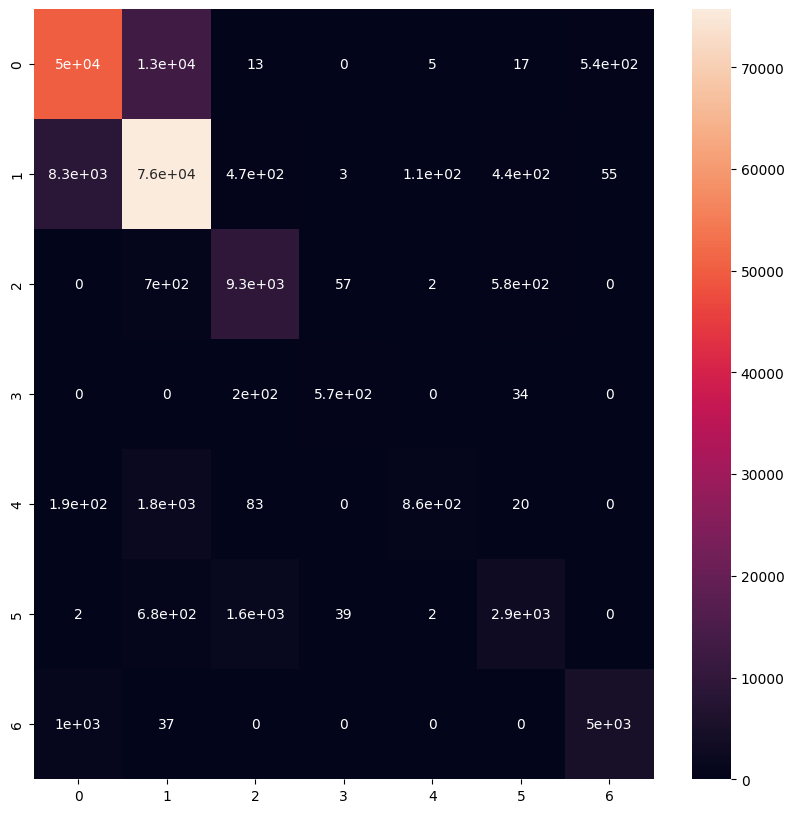

In [23]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))

sns.heatmap(cm, annot=True)

## 5 - Evaluación de Resultados

### Métricas utilizadas

#### Accuracy

La **accuracy** mide la proporción de predicciones correctas sobre el total de predicciones realizadas.

$\text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{True Positives} + \text{True Negatives} + \text{False Positives} + \text{False Negatives}}$

La **accuracy** es útil cuando las clases están equilibradas (es decir, cuando el número de muestras de cada clase es similar). Si las clases están desbalanceadas, la exactitud puede ser engañosa, ya que un modelo podría predecir siempre la clase mayoritaria y aún así tener un alto valor de exactitud.

#### Precision

La **precision** mide cuántas de las predicciones positivas realizadas por el modelo son realmente correctas. En otras palabras, de todas las veces que el modelo predijo la clase positiva, ¿cuántas veces fue correcta?

$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$

La **precision** es especialmente importante cuando los falsos positivos tienen un gran costo. Por ejemplo, si estás clasificando un correo como spam, no quieres que correos importantes (no spam) sean clasificados incorrectamente como spam.

#### Recall

El **recall** mide cuántos de los casos positivos reales fueron correctamente identificados por el modelo. Es decir, de todas las muestras que realmente son positivas, ¿cuántas el modelo logró predecir correctamente?

$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$

El **recall** es crucial cuando los falsos negativos son costosos. Un ejemplo es en diagnóstico médico: si un modelo no detecta enfermedades graves (falsos negativos), puede tener consecuencias muy negativas, por lo que el recall debe ser lo más alto posible.

#### F1-Score

El **F1-Score** es la media armónica de la precisión y el recall. Es una métrica que combina ambas, buscando un equilibrio entre ellas. Si la precisión o el recall son muy bajos, el F1-Score será bajo, ya que toma en cuenta ambos.

$F1\text{-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$

El **F1-Score** es útil cuando necesitas un balance entre precisión y recall y cuando las clases están desbalanceadas. Es particularmente útil en problemas donde tanto los falsos positivos como los falsos negativos son importantes.

### Comparativa entre modelos

In [24]:
model_acc = {"Nombre" : model_name,
            "Precisión" : score}

model_comp = pd.DataFrame(model_acc)

In [25]:
model_comp.sort_values(by="Precisión",ascending=False,ignore_index=True)

,Nombre,Precisión
0,Bosque Aleatorio,0.952027
1,Árboles de Decisión,0.924722
2,SVM,0.829413
3,Regresión Logística,0.715821
4,Perceptrón,0.637836


Aquí tenemos todos los modelos clasificados por orden, donde podemos ver claramente que el Bosque Aleatorio tiene la mejor precisión de entre todos los modelos.

## 6 - Conclusiones

La práctica ha permitido aplicar técnicas de aprendizaje automático para resolver un problema real de clasificación multiclase con el Forest Cover Type Dataset. A través del análisis exploratorio, la selección de modelos y el ajuste de hiperparámetros, se evidenció la importancia de un proceso estructurado y fundamentado.

Los modelos más complejos, como Bosques Aleatorios y SVM, mostraron el mejor rendimiento, mientras que los más simples, como Regresión Logística y Perceptrón, ofrecieron resultados aceptables pero limitados en patrones complejos. La evaluación mediante métricas como accuracy y F1-score permitió identificar áreas de mejora y analizar errores específicos. Sumado a esto, los modelos menos óptimos nos retrasaron el trabajo ya que en su ejecución teníamos un tiempo de espera muy alto lo que hacia que un error costase muy caro.

En resumen, la práctica ha reforzado la importancia de comprender los datos, justificar decisiones técnicas y adoptar un enfoque crítico para abordar problemas reales en aprendizaje automático.

## 7 - Créditos

Miquel Gorrías Romaguera  
Cristóbal Albertí Martínez